In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from typing import List
import glob

In [7]:
list_dir = glob.glob('/home/phu/Downloads/Lorenz/**')

In [8]:
list_dir

['/home/phu/Downloads/Lorenz/precal_lorenz_points_0.npy',
 '/home/phu/Downloads/Lorenz/precal_lorenz_points_1.npy',
 '/home/phu/Downloads/Lorenz/precal_lorenz_1.npy',
 '/home/phu/Downloads/Lorenz/precal_lorenz_0.npy']

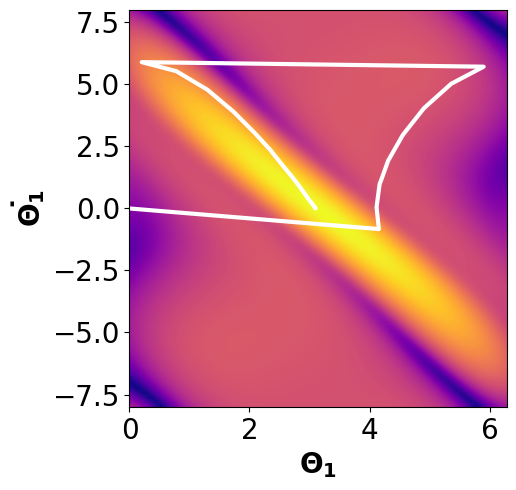

In [63]:
zs = np.load("/home/phu/Downloads/Pendulum/precal_pendulum_0001_700.npy")
X_reshaped = np.load('/home/phu/Downloads/Pendulum/precal_pendulum_points_0001_700.npy')
tjt=np.load("/home/phu/Downloads/pendulum_trajectory.npy")

T = 500
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

plot1 = ax.imshow(np.flip(zs[:,0].reshape(101,101),1), extent=[0, 2*np.pi , -8,8],aspect='auto',cmap='plasma',interpolation="bilinear")
ax.plot(tjt[0],tjt[1],linewidth=3, c='white')
# cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
font = {'size': 20}
ax.tick_params('x', labelsize=font['size'])
ax.tick_params('y', labelsize=font['size'])
ax.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$", fontsize = 20)
ax.set_xlabel(r"$\mathbf{\Theta_1}$", fontsize = 20)
# plt.title ('Simple Pendulum trajectory stablization', fontsize = 15)
fig.tight_layout()
fig.savefig('pendulum-trajectory.png', transparent=True)

In [56]:
tjt

array([[-2.42150847e-02,  2.55141201e+00,  2.79964684e+00,
         3.01485931e+00,  3.16729874e+00,  3.27193966e+00,
         3.33905092e+00,  3.37517460e+00,  3.38382355e+00,
         3.36591810e+00,  3.32034004e+00,  3.27484559e+00,
         3.24569241e+00,  3.21994047e+00,  3.19740476e+00,
         3.17974507e+00,  3.17243723e+00,  3.16942684e+00,
         3.17065636e+00,  3.17282701e+00,  3.17068559e+00,
         3.16900447e+00,  3.16986792e+00,  3.16990418e+00,
         3.17062679e+00,  3.17146220e+00,  3.17074149e+00,
         3.16967774e+00,  3.17064133e+00,  3.17205119e+00,
         3.17072173e+00,  3.16883871e+00,  3.17048926e+00,
         3.17288574e+00,  3.17064970e+00,  3.16905138e+00,
         3.16968668e+00,  3.16917599e+00,  3.17051360e+00,
         3.17222248e+00,  3.17068976e+00,  3.16870733e+00,
         3.17043414e+00,  3.17272276e+00,  3.17064821e+00,
         3.16897859e+00,  3.16988485e+00,  3.17000209e+00,
         3.17063132e+00,  3.17133585e+00,  3.17074610e+0

In [40]:
X_reshaped[np.argmax(zs[:,0])]

array([3.14159265, 0.        ])

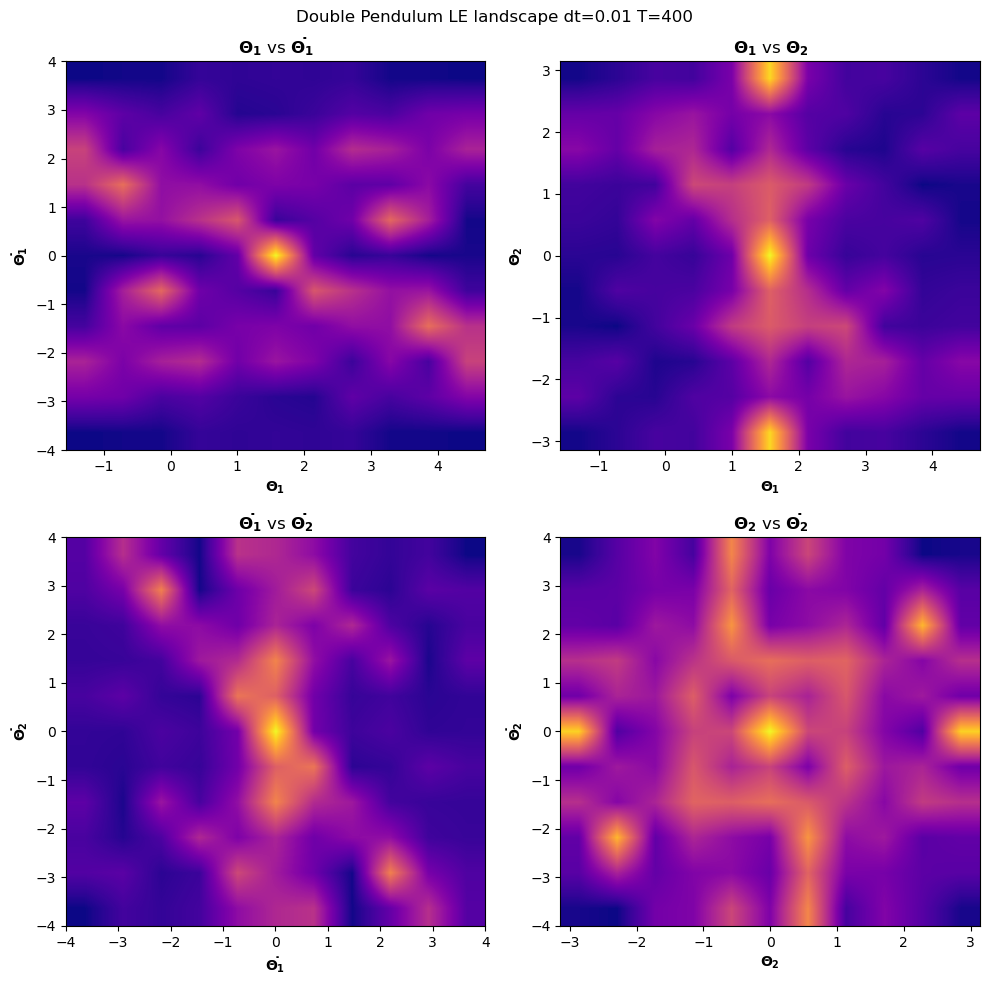

In [15]:
zs1 = np.load('/home/phu/Downloads/DP_experiment/precal_dp_400_001.npy')
X_reshaped = np.load('/home/phu/Downloads/DP_experiment/precal_dp_points_400_001.npy')

# l1 = zs[:,0].reshape(21, 21, 21, 21)
# l1[10][10][15][10] = 100

# zs_sum_pos = []
# for i in zs:
#     zs_sum_pos.append(sum(i[i>0]))
# zs = np.array(zs_sum_pos)
zs = zs1[:,0]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
l1 = zs.reshape(11, 11, 11, 11)[5,5,:,:]
ax1.imshow(np.flip(l1,1),extent=[-np.pi/2, 3*np.pi/2,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax1.plot(tjt[0],tjt[2],linewidth=3, c='white')
ax1.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\dot{\Theta_1}}$")
ax1.set_xlabel(r"$\mathbf{\Theta_1}$")
ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
ax2 = fig.add_subplot(222)
l2 = zs.reshape(11, 11, 11, 11)[5,:,5,:]
ax2.imshow(np.flip(l2,1),extent=[-np.pi/2, 3*np.pi/2,-np.pi,np.pi],cmap='plasma',aspect='auto',interpolation="bilinear")
ax2.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\Theta_2}$")
ax2.set_xlabel(r"$\mathbf{\Theta_1}$")
ax2.set_ylabel(r"$\mathbf{\Theta_2}$")
ax3 = fig.add_subplot(223)
l3 = zs.reshape(11, 11, 11, 11)[:,5,5,:]
ax3.imshow(np.flip(l3,1),extent=[-4, 4,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
ax3.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs $\mathbf{\dot{\Theta_2}}$")
ax3.set_xlabel(r"$\mathbf{\dot{\Theta_1}}$")
ax3.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
ax4 = fig.add_subplot(224)
l4 = zs.reshape(11, 11, 11, 11)[:,:,5,5]
ax4.imshow(np.flip(l4,1),extent=[-np.pi, np.pi,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax4.plot(tjt[1],tjt[3],linewidth=3, c='white')
ax4.set_title(r"$\mathbf{\Theta_2}$ vs $\mathbf{\dot{\Theta_2}}$")
ax4.set_xlabel(r"$\mathbf{\Theta_2}$")
ax4.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
fig.suptitle('Double Pendulum LE landscape dt=0.01 T=400')
fig.tight_layout()
plt.savefig('/home/phu/Dropbox/general_backup/mastering_chaos/DPLE_experiment/001400.png')

In [34]:
X_reshaped[np.argmax(zs)]

array([1.57079633, 0.        , 0.        , 0.        ])

In [16]:
zs1 = np.load('/home/phu/Downloads/precal_dp_300_001.npy')
X_reshaped = np.load('/home/phu/Downloads/precal_dp_points_300_001.npy')

# l1 = zs[:,0].reshape(21, 21, 21, 21)
# l1[10][10][15][10] = 100

zs_sum_pos = []
for i in zs1:
    zs_sum_pos.append(sum(i[i>0]))
zs = np.array(zs_sum_pos)
# zs = zs1[:,0]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
l1 = zs.reshape(21, 21, 21, 21)[10,10,:,:]
ax1.imshow(np.flip(l1,1),extent=[-np.pi/2, 3*np.pi/2,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax1.plot(tjt[0],tjt[2],linewidth=3, c='white')
ax1.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\dot{\Theta_1}}$")
ax1.set_xlabel(r"$\mathbf{\Theta_1}$")
ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
ax2 = fig.add_subplot(222)
l2 = zs.reshape(21, 21, 21, 21)[10,:,10,:]
ax2.imshow(np.flip(l2,1),extent=[-np.pi/2, 3*np.pi/2,-np.pi,np.pi],cmap='plasma',aspect='auto',interpolation="bilinear")
ax2.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\Theta_2}$")
ax2.set_xlabel(r"$\mathbf{\Theta_1}$")
ax2.set_ylabel(r"$\mathbf{\Theta_2}$")
ax3 = fig.add_subplot(223)
l3 = zs.reshape(21, 21, 21, 21)[:,10,10,:]
ax3.imshow(np.flip(l3,1),extent=[-4, 4,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
ax3.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs $\mathbf{\dot{\Theta_2}}$")
ax3.set_xlabel(r"$\mathbf{\dot{\Theta_1}}$")
ax3.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
ax4 = fig.add_subplot(224)
l4 = zs.reshape(21, 21, 21, 21)[:,:,10,10]
ax4.imshow(np.flip(l4,1),extent=[-np.pi, np.pi,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax4.plot(tjt[1],tjt[3],linewidth=3, c='white')
ax4.set_title(r"$\mathbf{\Theta_2}$ vs $\mathbf{\dot{\Theta_2}}$")
ax4.set_xlabel(r"$\mathbf{\Theta_2}$")
ax4.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
fig.suptitle('Double Pendulum LE landscape dt=0.01 T=300')
fig.tight_layout()
plt.savefig('/home/phu/Dropbox/general_backup/mastering_chaos/DPLE_experiment/001300.png')

FileNotFoundError: [Errno 2] No such file or directory: '/home/phu/Downloads/precal_dp_300_001.npy'

In [14]:
X_reshaped[np.argmax(zs)]

array([1.57079633, 0.        , 0.        , 0.        ])

In [7]:
zs[np.argmax(zs)]

6.189900279045105

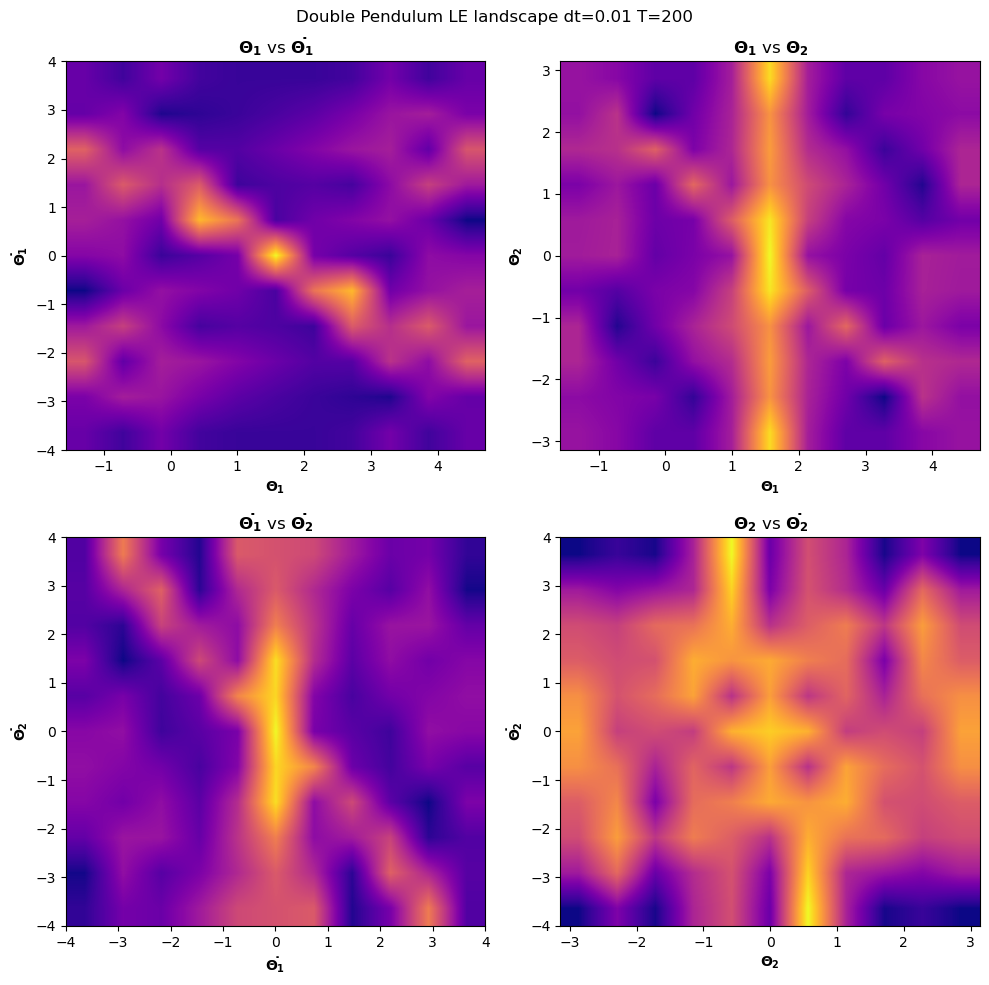

In [37]:
zs1 = np.load('/home/phu/Downloads/DP_experiment/precal_dp_200_001.npy')
X_reshaped = np.load('/home/phu/Downloads/DP_experiment/precal_dp_points_200_001.npy')

# l1 = zs[:,0].reshape(21, 21, 21, 21)
# l1[10][10][15][10] = 100

# zs_sum_pos = []
# for i in zs:
#     zs_sum_pos.append(sum(i[i>0]))
# zs = np.array(zs_sum_pos)
zs = zs1[:,0]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
l1 = zs.reshape(11, 11, 11, 11)[5,5,:,:]
ax1.imshow(np.flip(l1,1),extent=[-np.pi/2, 3*np.pi/2,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax1.plot(tjt[0],tjt[2],linewidth=3, c='white')
ax1.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\dot{\Theta_1}}$")
ax1.set_xlabel(r"$\mathbf{\Theta_1}$")
ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
ax2 = fig.add_subplot(222)
l2 = zs.reshape(11, 11, 11, 11)[5,:,5,:]
ax2.imshow(np.flip(l2,1),extent=[-np.pi/2, 3*np.pi/2,-np.pi,np.pi],cmap='plasma',aspect='auto',interpolation="bilinear")
ax2.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\Theta_2}$")
ax2.set_xlabel(r"$\mathbf{\Theta_1}$")
ax2.set_ylabel(r"$\mathbf{\Theta_2}$")
ax3 = fig.add_subplot(223)
l3 = zs.reshape(11, 11, 11, 11)[:,5,5,:]
ax3.imshow(np.flip(l3,1),extent=[-4, 4,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
ax3.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs $\mathbf{\dot{\Theta_2}}$")
ax3.set_xlabel(r"$\mathbf{\dot{\Theta_1}}$")
ax3.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
ax4 = fig.add_subplot(224)
l4 = zs.reshape(11, 11, 11, 11)[:,:,5,5]
ax4.imshow(np.flip(l4,1),extent=[-np.pi, np.pi,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax4.plot(tjt[1],tjt[3],linewidth=3, c='white')
ax4.set_title(r"$\mathbf{\Theta_2}$ vs $\mathbf{\dot{\Theta_2}}$")
ax4.set_xlabel(r"$\mathbf{\Theta_2}$")
ax4.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
fig.suptitle('Double Pendulum LE landscape dt=0.01 T=200')
plt.savefig('/home/phu/Dropbox/general_backup/mastering_chaos/DPLE_experiment/001200.png')
fig.tight_layout()

In [38]:
X_reshaped[np.argmax(zs)]

array([ 2.82743339, -4.        ,  1.25663706, -2.4       ])

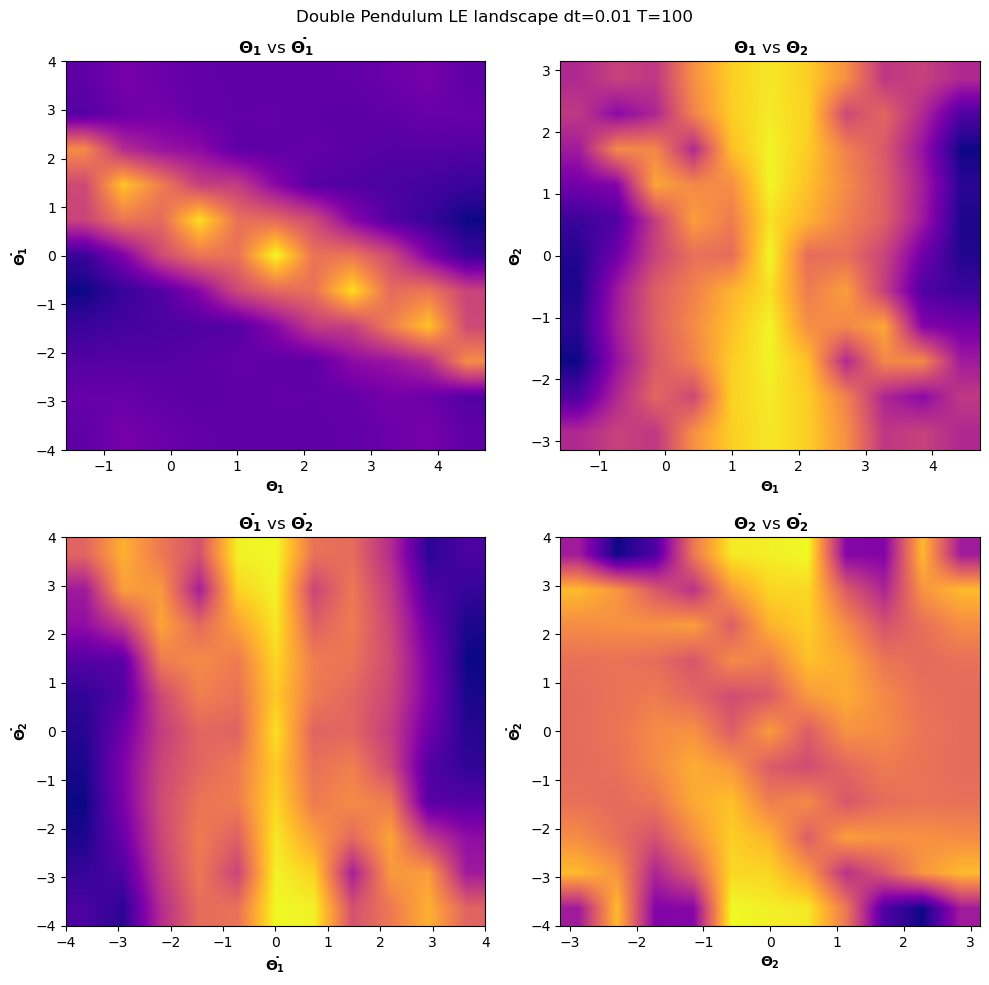

In [39]:
zs1 = np.load('/home/phu/Downloads/DP_experiment/precal_dp_100_001.npy')
X_reshaped = np.load('/home/phu/Downloads/DP_experiment/precal_dp_points_100_001.npy')

# l1 = zs[:,0].reshape(21, 21, 21, 21)
# l1[10][10][15][10] = 100

# zs_sum_pos = []
# for i in zs:
#     zs_sum_pos.append(sum(i[i>0]))
# zs = np.array(zs_sum_pos)
zs = zs1[:,0]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
l1 = zs.reshape(11, 11, 11, 11)[5,5,:,:]
ax1.imshow(np.flip(l1,1),extent=[-np.pi/2, 3*np.pi/2,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax1.plot(tjt[0],tjt[2],linewidth=3, c='white')
ax1.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\dot{\Theta_1}}$")
ax1.set_xlabel(r"$\mathbf{\Theta_1}$")
ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
ax2 = fig.add_subplot(222)
l2 = zs.reshape(11, 11, 11, 11)[5,:,5,:]
ax2.imshow(np.flip(l2,1),extent=[-np.pi/2, 3*np.pi/2,-np.pi,np.pi],cmap='plasma',aspect='auto',interpolation="bilinear")
ax2.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\Theta_2}$")
ax2.set_xlabel(r"$\mathbf{\Theta_1}$")
ax2.set_ylabel(r"$\mathbf{\Theta_2}$")
ax3 = fig.add_subplot(223)
l3 = zs.reshape(11, 11, 11, 11)[:,5,5,:]
ax3.imshow(np.flip(l3,1),extent=[-4, 4,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
ax3.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs $\mathbf{\dot{\Theta_2}}$")
ax3.set_xlabel(r"$\mathbf{\dot{\Theta_1}}$")
ax3.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
ax4 = fig.add_subplot(224)
l4 = zs.reshape(11, 11, 11, 11)[:,:,5,5]
ax4.imshow(np.flip(l4,1),extent=[-np.pi, np.pi,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax4.plot(tjt[1],tjt[3],linewidth=3, c='white')
ax4.set_title(r"$\mathbf{\Theta_2}$ vs $\mathbf{\dot{\Theta_2}}$")
ax4.set_xlabel(r"$\mathbf{\Theta_2}$")
ax4.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
fig.suptitle('Double Pendulum LE landscape dt=0.01 T=100')
plt.savefig('/home/phu/Dropbox/general_backup/mastering_chaos/DPLE_experiment/001100.png')
fig.tight_layout()

In [40]:
X_reshaped[np.argmax(zs)]

array([1.57079633, 4.        , 2.51327412, 3.2       ])

In [1]:
import numpy as np

In [2]:
a = np.array([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]])

In [4]:
a[:,-1]

array([5, 5, 5])